In [11]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import argparse


def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0,255)):

    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = weighted_color_threshold(image)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    else:
        raise ValueError

    # 3) Take the absolute value of the derivative or gradient
    abssobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abssobel/np.max(abssobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    # 6) Return this mask as your binary_output image

    # binary_output = np.copy(img) # Remove this line
    return sbinary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):


    # Apply the following steps to img
    # 1) Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = weighted_color_threshold(image)
    

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Calculate the magnitude
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)

    abs_sobelxy = np.sqrt(abs_sobelx **2 + abs_sobely **2)

    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1

    # 6) Return this mask as your binary_output image
    # binary_output = np.copy(img) # Remove this line
    return sbinary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):

    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image

    # Apply the following steps to img
    # 1) Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = weighted_color_threshold(image)
    

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    # 3) Calculate the magnitude
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)

    # abs_sobelxy = np.sqrt(abs_sobelx **2 + abs_sobely **2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # scaled_sobel = np.uint8(255 * abs_sobelxy/np.max(abs_sobelxy))

    direction = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where mag thresholds are met
    sbinary = np.zeros_like(direction)
    sbinary[(direction > thresh[0]) & (direction < thresh[1])] = 1

    # binary_output = np.copy(img) # Remove this line
    return sbinary



def show_image(image):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=50)

    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    ax2.imshow(hls)
    ax2.set_title('HLS', fontsize=50)

    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    ax3.imshow(hsv)
    ax3.set_title('HSV', fontsize=50)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()


def apply_gradient_thresholds(image, ksize=3, sobel_thresh=(0,255), plot=False):

    # Choose a Sobel kernel size
    #ksize = 3 # Choose a larger odd number to smooth gradient measurements

    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=sobel_thresh)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=sobel_thresh)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=sobel_thresh)
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=sobel_thresh)

    combined = np.zeros_like(dir_binary)
    combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

    # Run the function
    #     dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(.7, 1.2))
    if plot:
        plot_side_by_side(image, combined)
        output = None
    else:
        output = combined
    return output
    
def plot_side_by_side(image1, image2):
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(image1)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(image2, cmap='gray')
    ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()



def apply_threshold(image, thresh=(90, 255)):
    """Threshold a single channel (2d) image."""
    if len(image.shape) != len(thresh):
        raise ValueError('image should be single channel 2d')
    binary = np.zeros_like(image)
    binary[(image > thresh[0]) & (image <= thresh[1])] = 1
    return binary


def get_hls(image):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    return H, L, S

def get_rgb(image):
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    return R, G, B

def weighted_color_threshold(image):
    R, G, B = get_rgb(image)
    H, L, S = get_hls(image)
    binaryR = apply_threshold(R, thresh=(200, 255))
    binaryS = apply_threshold(S, thresh=(90, 255))

    binary = (binaryR + binaryS) / 2.0
    return binary

In [12]:
image = mpimg.imread('../img/signs_vehicles_xygrad.jpg')

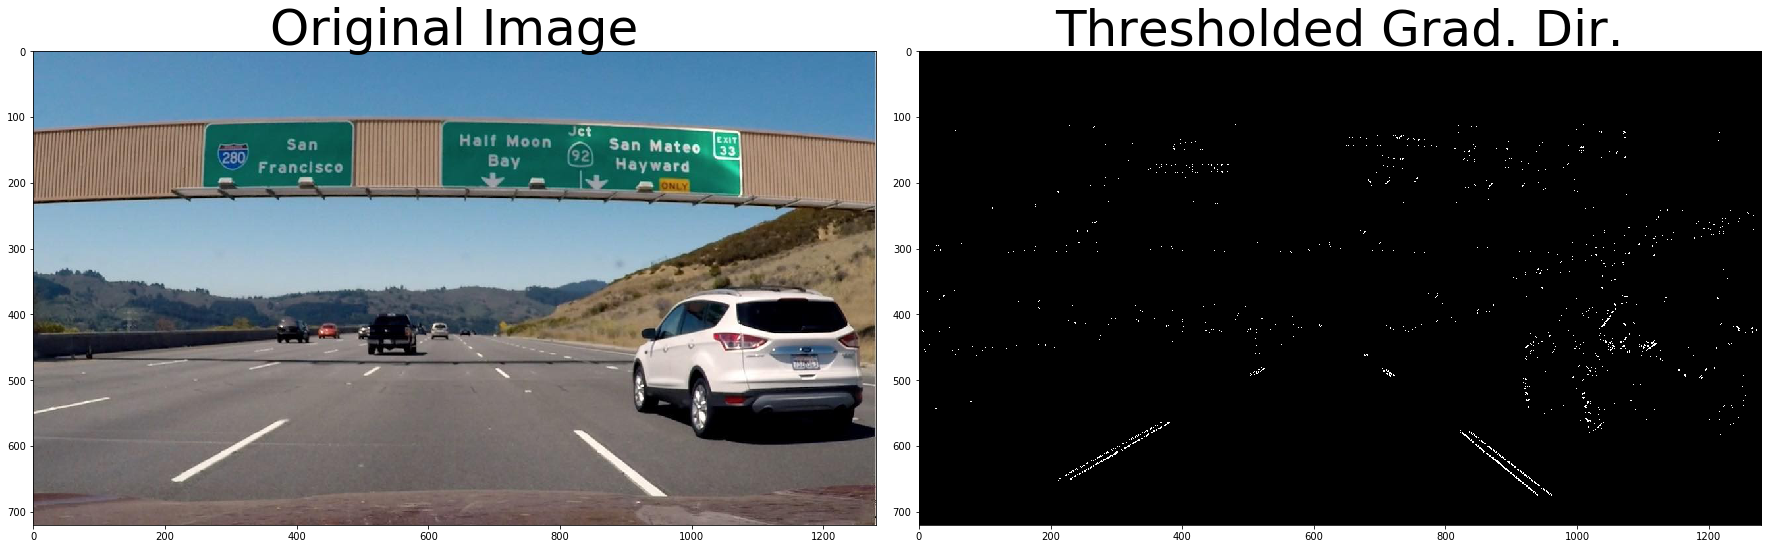

In [14]:
apply_gradient_thresholds(image, ksize=5, sobel_thresh=(80,200), plot=True)